<a href="https://colab.research.google.com/github/LIZZETHGOMEZ/BEDU-Santander-2021/blob/main/Analisis%20de%20Datos%20con%20Python/Sesion_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Distribuciones muestrales y técnicas de evaluación de modelos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/MyDrive/datasets_BEDU/Remoto diabetes-clean.csv')
df.head()

,Unnamed: 0,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,0,6,148,72,35,0,33.6,0.627,50,1
1,1,1,85,66,29,0,26.6,0.351,31,0
2,2,8,183,64,0,0,23.3,0.672,32,1
3,3,1,89,66,23,94,28.1,0.167,21,0
4,4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df['glucose'].sample(n = 20, replace = False)

92      81
193    135
506    180
468    120
509    120
731    120
354     90
367    101
435    141
586    143
36     138
714    102
412    143
467     97
78     131
651    117
476    105
695    142
459    134
45     180
Name: glucose, dtype: int64

In [8]:
# Queremos una fracion del 10% de la poblacion
df['glucose'].sample(frac = 0.1, replace = True)

463     88
693    129
338    152
55      73
693    129
      ... 
8      197
504     96
122    107
520     68
479    132
Name: glucose, Length: 77, dtype: int64

## Bootstrap

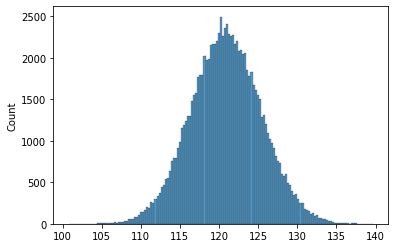

In [11]:
#Simulación de nuevas muestras a partir de las que tenemos
medias = []

for i in range(100_000): # el guin bajo solo es de referencia, no se lee
  muestra = df['glucose'].sample(n = 50, replace = True)
  medias.append(muestra.mean())

# Graficamos nuestra simulacion
medias_serie = pd.Series(medias)
sns.histplot(medias_serie);

In [12]:
# Observemos la simetría
medias_serie.skew()

0.03318122239322465

In [15]:
#Observemos la curtosis
medias_serie.kurtosis()

0.029240598517845218

### Ejercicio

In [16]:
data = pd.read_csv('/content/drive/MyDrive/datasets_BEDU/Remoto us_unemployment-oct_2012.csv')
data.head()

,State,Unemployment
0,AL,7.1
1,AK,6.8
2,AZ,8.1
3,AR,7.2
4,CA,10.1


In [24]:
print(f" Media: {data['Unemployment'].mean()}")
print(f" Mediana: {data['Unemployment'].median()}")

 Media: 7.146
 Mediana: 7.1


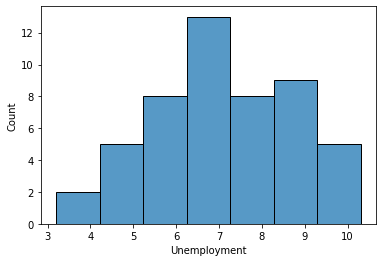

In [28]:
sns.histplot(data['Unemployment']);

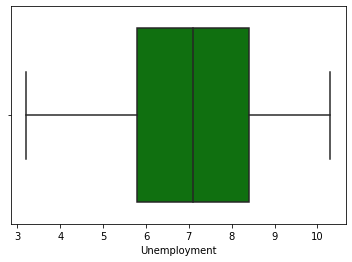

In [32]:
sns.boxplot(x = data['Unemployment'], color = 'green');

-0.020766009849655497
-0.012031422086606458


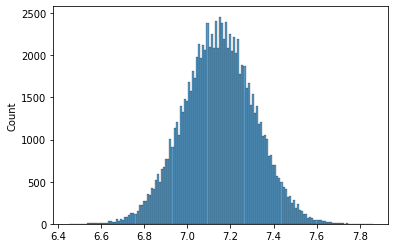

In [37]:
#Simulación de nuevas muestras a partir de las que tenemos
medias = []

for i in range(100_000): # el guin bajo solo es de referencia, no se lee
  muestra = data['Unemployment'].sample(n = 100, replace = True)
  medias.append(muestra.mean())

# Graficamos nuestra simulacion
medias_serie = pd.Series(medias)
sns.histplot(medias_serie);

print(medias_serie.skew())
print(medias_serie.kurtosis())


-0.042542156904480384
-0.05515919672706193


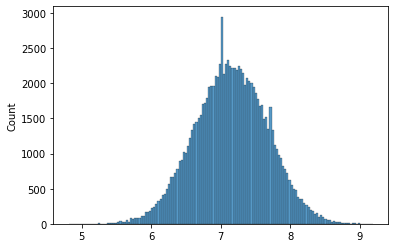

In [35]:
# Con 20%
medias = []

for i in range(100_000): # el guin bajo solo es de referencia, no se lee
  muestra = data['Unemployment'].sample(frac = 0.2, replace = True)
  medias.append(muestra.mean())

# Graficamos nuestra simulacion
medias_serie = pd.Series(medias)
sns.histplot(medias_serie);

print(medias_serie.skew())
print(medias_serie.kurtosis())

-0.01696280934589411
-0.018852510944425305


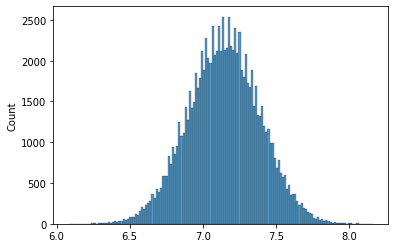

In [36]:
# Con 90% de la muestra
medias = []

for i in range(100_000): # el guin bajo solo es de referencia, no se lee
  muestra = data['Unemployment'].sample(frac = 0.9, replace = True)
  medias.append(muestra.mean())

# Graficamos nuestra simulacion
medias_serie = pd.Series(medias)
sns.histplot(medias_serie);

print(medias_serie.skew())
print(medias_serie.kurtosis())